### Assumptions on Multiple regression

* There must be a linear relationship between the outcome variable and the independent variables.  Scatterplots can show whether there is a linear or curvilinear relationship.
* Multivariate Normality–Multiple regression assumes that the residuals are normally distributed.
* No Multicollinearity—Multiple regression assumes that the independent variables are not highly correlated with each other.  This assumption is tested using Variance Inflation Factor (VIF) values.
* Homoscedasticity–This assumption states that the variance of error terms are similar across the values of the independent variables.  A plot of standardized residuals versus predicted values can show whether points are equally distributed across all values of the independent variables.

## Loading required Libraries

In [282]:
import warnings
## Ignoring warnings 
warnings.filterwarnings('ignore')

## Show warning for just once
#warnings.filterwarnings(action='once')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
from scipy import stats
from scipy.stats import norm, skew
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

## Loading Data Set

In [283]:
trainData = pd.read_csv('/workspace/python/house-price-predict/train.csv')

## Exploratory Data Analysis - I

In [284]:
trainData.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### List Possible Categorical Variables

In [285]:
def listFactorVars(dataFrame):
    for col in dataFrame:
        if (len(trainData[col].unique()) < 15):
            print("{} : {}".format(col, trainData[col].unique()))
        else:
            None

listFactorVars(trainData)

MSZoning : ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street : ['Pave' 'Grvl']
Alley : [nan 'Grvl' 'Pave']
LotShape : ['Reg' 'IR1' 'IR2' 'IR3']
LandContour : ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities : ['AllPub' 'NoSeWa']
LotConfig : ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope : ['Gtl' 'Mod' 'Sev']
Condition1 : ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 : ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType : ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle : ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
OverallQual : [ 7  6  8  5  9  4 10  3  1  2]
OverallCond : [5 8 6 7 4 2 3 9 1]
RoofStyle : ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl : ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
MasVnrType : ['BrkFace' 'None' 'Stone' 'BrkCmn' nan]
ExterQual : ['Gd' 'TA' 'Ex' 'Fa']
ExterCond : ['TA' 'Gd' 'Fa' 'Po' 'Ex']
Foundation : ['PConc' 'CBlock' 'BrkTil' 'Wood' 'Slab' 'St

### Changing the dtypes of categorical features to string

In [286]:
numCat2str = ['OverallQual', 'OverallCond','BsmtFullBath', 'BsmtHalfBath' ,'FullBath', 'HalfBath' ,'BedroomAbvGr'
              ,'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces' ,'GarageCars', 'PoolArea', 'MoSold','YrSold']

In [287]:
%%html
<style>
rendered_html tr, .rendered_html th, .rendered_html td
{ 
 font-family: "Times New Roman", Times, serif;
 text-align: left;
}
</style>

House Features | Plot Features | Location Features
--------------- | --------------- | ------------------ 
MSSubClass, Utilities, BldgType, HouseStyle,  GarageYrBlt|MSZoning |Street
OverallQual, OverallCond, YearBuilt, YearRemodAdd, GarageCars|LandSlope|Condition2
RoofStyle, RoofMatl, Exterior1st, Exterior2nd, OpenPorchSF|LotShape|Neighborhood
MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation|LotConfig|
BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, EnclosedPorch|LotFrontage|
BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF| LotArea|
TotalBsmtSF, Heating, HeatingQC, CentralAir, MiscVal|LandContour|
Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF,Fence||
GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath||
HalfBath, Bedroom, Kitchen, KitchenQual, TotRmsAbvGrd||
Functional, Fireplaces, FireplaceQu, GarageType, GarageFinish||
GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF||
3SsnPorch, ScreenPorch, PoolArea, PoolQC, MiscFeature||
MoSold, YrSold, SaleType, SaleCondition||Condition1

We have categorized the overall features into three categories, lets think more generally and list only features which we will condisder most when we are buying a house. I have come with below features that would be relevent for me, we will discuss in detail about relevent features below.

*MSSubClass, LotArea, Street, Neighborhood, Condition1, BldgType, OverallQual, YearBuilt, ExterQual , Foundation, Electrical, GarageType ,GrLivArea*

So lets investigate the relationship of above listed features with variable SalePrice.

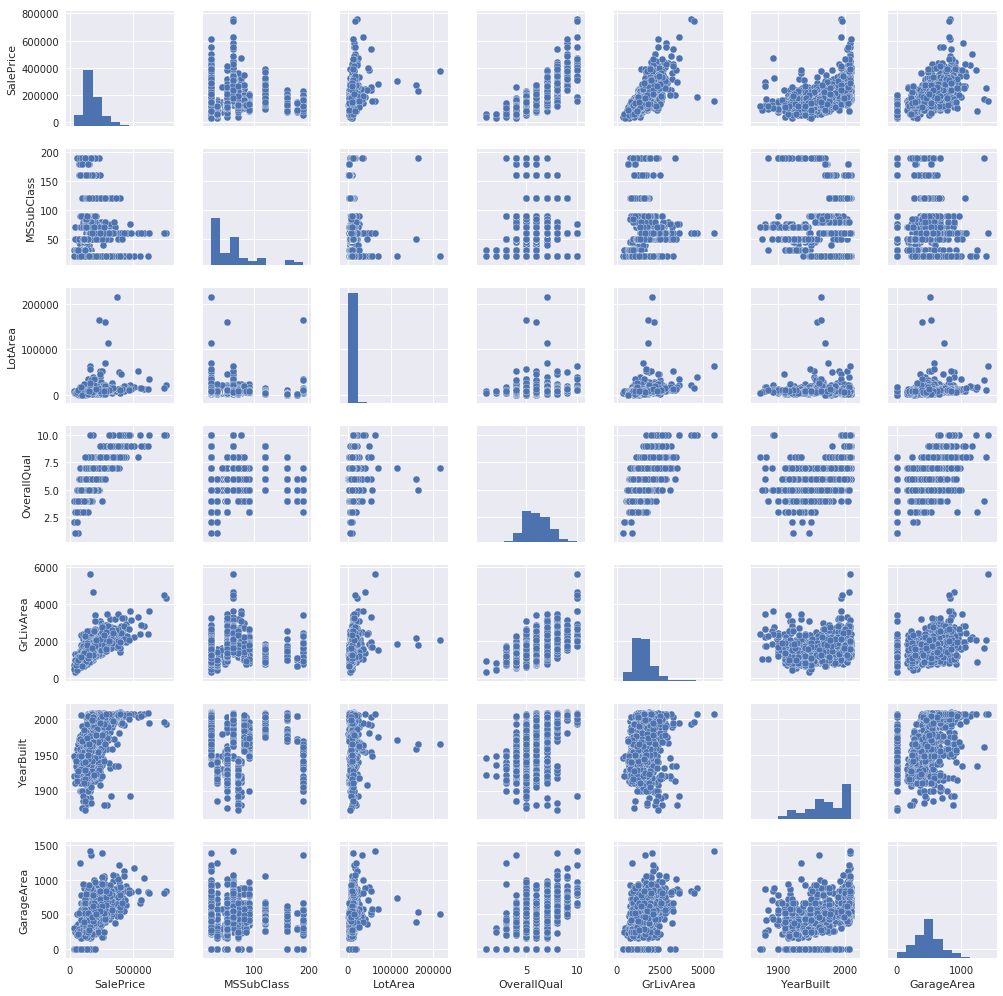

In [288]:
sns.set()
cols = ['SalePrice', 'MSSubClass', 'LotArea', 'OverallQual','GrLivArea','YearBuilt','GarageArea']
sns.pairplot(trainData[cols], size = 2)
plt.show();

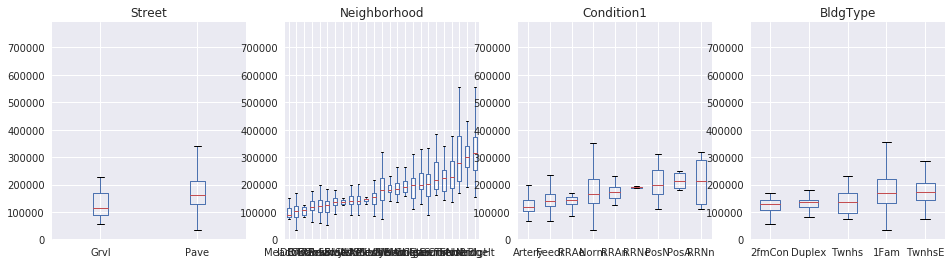

In [289]:
def sortBoxplot(df, by,column):
    fig = plt.figure(figsize=(16,4))
    i=141
    for r in by:
        ax = fig.add_subplot(i)
        ax.set_title(r)
        df1 = pd.DataFrame({col:vals[column] for col,vals in df.groupby(r)})
        mean=df1.median().sort_values()
        df1[mean.index].boxplot(rot=0,ax=ax)
        i=i+1
        

sortBoxplot(trainData, by=['Street','Neighborhood','Condition1','BldgType'],column='SalePrice')

As we analyzed the relationship between variables of our intrest and its impact on SalePrice. And most of our variables of intrest has impact on SalePrice of house. We have gain an idea that our variables have impact but we don't know whether there are more important features than we considered. So for that we will look through correlation plot using corrmat.

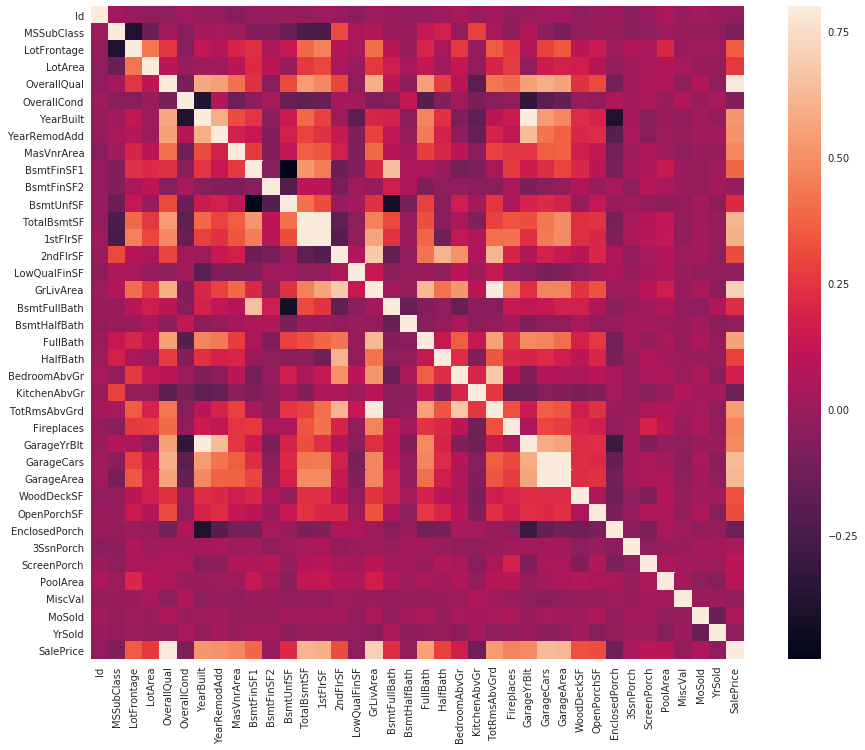

In [290]:
corrmat = trainData.corr()
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corrmat, vmax=.8, square=True);

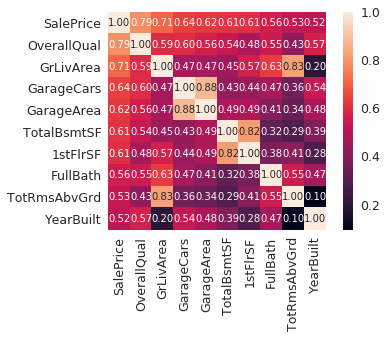

In [291]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(trainData[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## Univeriate Analysis

In [292]:
trainData['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

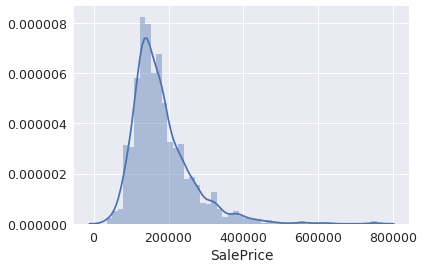

In [293]:
sns.distplot(trainData['SalePrice']);

In [294]:
print("Skewness: %f" % trainData['SalePrice'].skew())
print("Kurtosis: %f" % trainData['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


## Feature Engineering

### Cleaning Data

In [295]:
testData = pd.read_csv('/workspace/python/house-price-predict/test.csv')
trainData['dataType']='train'
testData['dataType']='test'
SalePrice = trainData['SalePrice']
fullData = pd.concat((trainData, testData)).reset_index(drop=True)
fullData.drop(['SalePrice'], axis=1, inplace=True)
del testData
del trainData
#print("fullData size : {}".format(fullData.shape))
#fullData.head(10)
#sns.set()
#sns.pairplot(trainData, size = 2.5)
#plt.show();

## MSSubClass, LotArea, Street, Neighborhood, Condition1, BldgType, OverallQual, YearBuilt, ExterQual , Foundation, Electrical
## GarageType ,GrLivArea

### Imputing Missing Values

First lets view percentage and count of missing values for all features within the traning data.

In [296]:
nullcount = fullData.isnull().sum().sort_values(ascending=False)
percent = (fullData.isnull().sum()/fullData.isnull().count()).sort_values(ascending=False)
misData = pd.concat([nullcount[nullcount > 0], percent[percent > 0]], axis=1, keys=['Total','Percent'])
misData[misData['Percent'] < 0.20 ]

,Total,Percent
LotFrontage,486,0.166495
GarageCond,159,0.054471
GarageFinish,159,0.054471
GarageQual,159,0.054471
GarageYrBlt,159,0.054471
GarageType,157,0.053786
BsmtCond,82,0.028092
BsmtExposure,82,0.028092
BsmtQual,81,0.027749
BsmtFinType2,80,0.027407


We will be not using the features which have missing values > 15%. As imputing and inclusion of them with in our model may introduce extra noise and outlier in our data.

#### Imputing Missing values for Electrical
We have observed that the Electrical feature is of Categorical type. Before imputing Missing values lets gain some insights about feature Electrical. 

In [297]:
def giveCountsinDF(dataFrame, colum, inlinePrint=False):
    for col in colum:
        nulcnt = pd.crosstab(index=dataFrame[col], columns="count")
        nulcnt.columns=['Value Count']
        if(inlinePrint):
            print(nulcnt)
            print("\n")
        else:
            return(nulcnt)

In [298]:
giveCountsinDF(fullData, ['Electrical'])

,Value Count
Electrical,
FuseA,188
FuseF,50
FuseP,8
Mix,1
SBrkr,2671


Ahh! most of the values are for category __SBrkr__, hence we will assign the values of it for missing values.

In [299]:
fullData['Electrical'].fillna("SBrkr", inplace=True)
fullData['Electrical'].isnull().sum()

0

#### Imputing Missing values for KitchenQual

We will use the value of the category with maximum count in place of Nan.

In [300]:
giveCountsinDF(fullData, ['KitchenQual'])

,Value Count
KitchenQual,
Ex,205
Fa,70
Gd,1151
TA,1492


In [301]:
fullData['KitchenQual'].fillna("TA", inplace=True)
fullData['KitchenQual'].isnull().sum()

0

#### Imputing Missing values for Exterior1st, Exterior2nd

We will use the value of the category with maximum count in place of Nan.

In [302]:
giveCountsinDF(fullData, ['Exterior1st','Exterior2nd'], True)

             Value Count
Exterior1st             
AsbShng               44
AsphShn                2
BrkComm                6
BrkFace               87
CBlock                 2
CemntBd              126
HdBoard              442
ImStucc                1
MetalSd              450
Plywood              221
Stone                  2
Stucco                43
VinylSd             1025
Wd Sdng              411
WdShing               56


             Value Count
Exterior2nd             
AsbShng               38
AsphShn                4
Brk Cmn               22
BrkFace               47
CBlock                 3
CmentBd              126
HdBoard              406
ImStucc               15
MetalSd              447
Other                  1
Plywood              270
Stone                  6
Stucco                47
VinylSd             1014
Wd Sdng              391
Wd Shng               81




In [303]:
fullData['Exterior1st'].fillna("VinylSd", inplace=True)
fullData['Exterior2nd'].fillna("VinylSd", inplace=True)

#### Imputing missing values for MasVnrType
The feature MasVnrType is also categorical type.

In [304]:
giveCountsinDF(fullData, ['MasVnrType'])

,Value Count
MasVnrType,
BrkCmn,25
BrkFace,879
None,1742
Stone,249


In [305]:
fullData['MasVnrType'].fillna("None", inplace=True)
fullData['MasVnrType'].isnull().sum()

0

#### Imputing missing values for MasVnrArea
As the variable is integer hence, lets view its central properties.

In [306]:
fullData['MasVnrArea'].describe()

count    2896.000000
mean      102.201312
std       179.334253
min         0.000000
25%         0.000000
50%         0.000000
75%       164.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

Ohhh!! median is 0, so we can assume that there is no masion area. So we will simply replace the Nan values with median.

In [307]:
fullData['MasVnrArea'].fillna(0.0, inplace=True)
fullData['MasVnrArea'].isnull().sum()

0

#### Imputing missing values for features related to basement
As all the features related to basement with missing values are categorical type, we can review them as below:

In [308]:
giveCountsinDF(fullData, ['BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2','BsmtExposure','BsmtFullBath',
                          'BsmtHalfBath'], True)

          Value Count
BsmtQual             
Ex                258
Fa                 88
Gd               1209
TA               1283


          Value Count
BsmtCond             
Fa                104
Gd                122
Po                  5
TA               2606


              Value Count
BsmtFinType1             
ALQ                   429
BLQ                   269
GLQ                   849
LwQ                   154
Rec                   288
Unf                   851


              Value Count
BsmtFinType2             
ALQ                    52
BLQ                    68
GLQ                    34
LwQ                    87
Rec                   105
Unf                  2493


              Value Count
BsmtExposure             
Av                    418
Gd                    276
Mn                    239
No                   1904


              Value Count
BsmtFullBath             
0.0                  1705
1.0                  1172
2.0                    38
3.0                     

Hmmmm! Before imputing missing values let's think that, the house we are buying my do not have basement features at all that are missing. Hence lets's impute the missing values as another category as __None__ for all features with Nan. Before doing so, first lets check if the all missing vlaues of the features are form the same row or not.

In [309]:
def checkSameRow(df,idx ,columns, count=5):
    tempdf = df[df[idx].isnull()].index
    return(df.loc[tempdf,columns].head(count))

columns=['Id','BsmtQual','BsmtCond', 'BsmtFinType1','BsmtFinType2','BsmtExposure','BsmtFullBath',
         'BsmtUnfSF','BsmtHalfBath','TotalBsmtSF']
checkSameRow(fullData, 'BsmtCond', columns, 5)

,Id,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinType2,BsmtExposure,BsmtFullBath,BsmtUnfSF,BsmtHalfBath,TotalBsmtSF
17,18,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
39,40,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
90,91,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
102,103,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
156,157,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0


Bingo! All the features realted to basement are from same rows. Hence we can safely treat them as those houses do not contain there features.

In [310]:
fullData['BsmtQual'].fillna("None", inplace=True)
fullData['BsmtCond'].fillna("None", inplace=True)
fullData['BsmtFinType1'].fillna("None", inplace=True)
fullData['BsmtFinType2'].fillna("None", inplace=True)
fullData['BsmtExposure'].fillna("No", inplace=True)

print(fullData['BsmtFinSF1'].describe())
print("\n")
print(fullData['BsmtFinSF2'].describe())
print("\n")
print(fullData['BsmtUnfSF'].describe())
print("\n")
print(fullData['TotalBsmtSF'].describe())

count    2918.000000
mean      441.423235
std       455.610826
min         0.000000
25%         0.000000
50%       368.500000
75%       733.000000
max      5644.000000
Name: BsmtFinSF1, dtype: float64


count    2918.000000
mean       49.582248
std       169.205611
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1526.000000
Name: BsmtFinSF2, dtype: float64


count    2918.000000
mean      560.772104
std       439.543659
min         0.000000
25%       220.000000
50%       467.000000
75%       805.500000
max      2336.000000
Name: BsmtUnfSF, dtype: float64


count    2918.000000
mean     1051.777587
std       440.766258
min         0.000000
25%       793.000000
50%       989.500000
75%      1302.000000
max      6110.000000
Name: TotalBsmtSF, dtype: float64


We can view that all most data are 0, hence we will impute missing values as to be 0.0.

In [311]:
fullData['BsmtFinSF1'].fillna(0.0, inplace=True)
fullData['BsmtFinSF2'].fillna(0.0, inplace=True)
fullData['BsmtUnfSF'].fillna(467.0, inplace=True)

In [312]:
columns=['Id','BsmtQual','BsmtCond', 'BsmtFinType1','BsmtFinType2','BsmtExposure','BsmtFullBath','BsmtHalfBath','TotalBsmtSF']
checkSameRow(fullData, 'BsmtFullBath', columns, 5)

,Id,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinType2,BsmtExposure,BsmtFullBath,BsmtHalfBath,TotalBsmtSF
2120,2121,None,None,None,None,No,NaN,NaN,NaN
2188,2189,None,None,None,None,No,NaN,NaN,0.0


In [313]:
fullData['BsmtFullBath'].fillna(0.0, inplace=True)
fullData['BsmtHalfBath'].fillna(0.0, inplace=True)
columns=['Id','BsmtQual','BsmtCond', 'BsmtFinType1','BsmtFinType2','BsmtExposure','BsmtFullBath','BsmtHalfBath','TotalBsmtSF']
checkSameRow(fullData, 'TotalBsmtSF', columns, 5)

,Id,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinType2,BsmtExposure,BsmtFullBath,BsmtHalfBath,TotalBsmtSF
2120,2121,None,None,None,None,No,0.0,0.0,NaN


In [314]:
fullData['TotalBsmtSF'].fillna(0.0, inplace=True)

#### Imputing missing values for features related to Garage

In [315]:
giveCountsinDF(fullData, ['GarageCond','GarageType','GarageFinish','GarageQual','GarageCars'], True)

            Value Count
GarageCond             
Ex                    3
Fa                   74
Gd                   15
Po                   14
TA                 2654


            Value Count
GarageType             
2Types               23
Attchd             1723
Basment              36
BuiltIn             186
CarPort              15
Detchd              779


              Value Count
GarageFinish             
Fin                   719
RFn                   811
Unf                  1230


            Value Count
GarageQual             
Ex                    3
Fa                  124
Gd                   24
Po                    5
TA                 2604


            Value Count
GarageCars             
0.0                 157
1.0                 776
2.0                1594
3.0                 374
4.0                  16
5.0                   1




In [316]:
columns=['Id','GarageType','GarageFinish','GarageCond','GarageQual','GarageYrBlt','GarageCars']
checkSameRow(fullData, 'GarageCond', columns, 5)

,Id,GarageType,GarageFinish,GarageCond,GarageQual,GarageYrBlt,GarageCars
39,40,NaN,NaN,NaN,NaN,NaN,0.0
48,49,NaN,NaN,NaN,NaN,NaN,0.0
78,79,NaN,NaN,NaN,NaN,NaN,0.0
88,89,NaN,NaN,NaN,NaN,NaN,0.0
89,90,NaN,NaN,NaN,NaN,NaN,0.0


Same case for Garage features. So lets assign all the missing values for categorical values to None and 0.0 to feature GarageYrBlt.

In [317]:
fullData['GarageType'].fillna("None", inplace=True)
fullData['GarageFinish'].fillna("None", inplace=True)
fullData['GarageCond'].fillna("None", inplace=True)
fullData['GarageQual'].fillna("None", inplace=True)
fullData['GarageYrBlt'].fillna(0.0, inplace=True)

print(fullData['GarageArea'].describe())
print("\n")
print(fullData['GarageCars'].describe())

count    2918.000000
mean      472.874572
std       215.394815
min         0.000000
25%       320.000000
50%       480.000000
75%       576.000000
max      1488.000000
Name: GarageArea, dtype: float64


count    2918.000000
mean        1.766621
std         0.761624
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: GarageCars, dtype: float64


In [318]:
columns=['Id','GarageType','GarageFinish','GarageCond','GarageQual','GarageYrBlt','GarageCars','GarageArea']
checkSameRow(fullData, 'GarageCars', columns, 5)

,Id,GarageType,GarageFinish,GarageCond,GarageQual,GarageYrBlt,GarageCars,GarageArea
2576,2577,Detchd,None,None,None,0.0,NaN,NaN


In [319]:
fullData['GarageCars'].fillna(0.0, inplace=True)
fullData['GarageArea'].fillna(0.0, inplace=True)

#### Imputing missing values for Functional 

In [320]:
giveCountsinDF(fullData, ['Functional'])

,Value Count
Functional,
Maj1,19
Maj2,9
Min1,65
Min2,70
Mod,35
Sev,2
Typ,2717


In [321]:
columns=['Id','Functional','OverallCond']
checkSameRow(fullData, 'Functional', columns, 5)

,Id,Functional,OverallCond
2216,2217,NaN,5
2473,2474,NaN,1


In [322]:
fullData.loc[2216,['Functional']] = 'Sev'
fullData.loc[2473,['Functional']] = 'Mod'

#### Imputing missing values for Utilities

In [323]:
giveCountsinDF(fullData, ['Utilities'])

,Value Count
Utilities,
AllPub,2916
NoSeWa,1


In [324]:
fullData['Utilities'].fillna('AllPub', inplace=True)

#### Imputing missing values for SaleType

In [325]:
giveCountsinDF(fullData, ['SaleType'])

,Value Count
SaleType,
COD,87
CWD,12
Con,5
ConLD,26
ConLI,9
ConLw,8
New,239
Oth,7
WD,2525


In [326]:
fullData['SaleType'].fillna('WD', inplace=True)

#### Imputing missing values for MSZoning

In [327]:
giveCountsinDF(fullData, ['MSZoning'])

,Value Count
MSZoning,
C (all),25
FV,139
RH,26
RL,2265
RM,460


In [328]:
fullData['SaleType'].fillna('RL', inplace=True)

#### Imputing missing values for feature MSZoning

#### Imputing missing values for feature LotFrontage

In [329]:
fullData['LotFrontage'].describe()

count    2433.000000
mean       69.305795
std        23.344905
min        21.000000
25%        59.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

Lets develop a function to impute the imssing variables. We will use RandomForest to impute the missing values for LotFrontage.

In [ ]:
def imputeMissing(df, idx, predictors):
    tempdf = df[df[outcome].isnull()].index
    tempndf = df[df[idx].notnull()].index
    model = RandomForestClassifier(n_estimators=100)
    model.fit(df.loc[tempndf, predictors], df.loc[tempndf, [outcome]])
    predict = model.predict(df.loc[tempndf, predictors])
    j=0;
    for i in tempdf:
        df.loc[i,outcome] = predict[j]
        j=j+1
    return(df)

We will use the other lot features to impute the missing values for LotFrontage variable.

In [ ]:
predictors=['LotArea','Street','LotShape','LandContour','LotConfig']
outcome='LotFrontage'

## Encode the variable to numeric 
var_mod = ['Street','LotShape','LandContour','LotConfig']
le = LabelEncoder()
for i in var_mod:
    fullData[i] = le.fit_transform(fullData[i].astype(str))

fullData = imputeMissing(fullData,outcome,predictors)
fullData['LotFrontage'].isnull().sum()

Now, we are done with imputing missing values as we will left all other features with missing values untoched as further imputation may make our model more worse.

In this section we will do some feature engineering i.e. merge/omit/add new features. Ad during imputing of missing values for Garage we find that features __GarageQual__ and __GarageCond__ have same categories and almost same values. Hence we will look in detail for feature engineering.

## Outliars and Noise filtering
From the plot in line 7 (__Out[7]__) we witnessed that the features with extreme values are __LotArea__, __GrLivArea__, __GarageArea__, __YearBuilt__. Now lets explore their relationship with SalePrice. Before proceeding let's first split out combined data to their respective tag's i.e. train and test.

In [ ]:
trainIdx = fullData[fullData['dataType']=='train'].index
testIdx = fullData[fullData['dataType']=='test'].index

#trainData = pd.concat(fullData.iloc[trainIdx],SalePrice['SalePrice']).reset_index(drop=True)

testData = fullData.iloc[testIdx]
x = testData.isnull().sum()
#trainData.columns
#SalePrice = pd.DataFrame(data=SalePrice)
#SalePrice
type(SalePrice)

#fullData = pd.concat((trainData, testData)).reset_index(drop=True)

In [ ]:
#sns.regplot(x=trainData["GrLivArea"], y=trainData["SalePrice"])